## 一、数据可视化探索

通过可视化探索，对数据可以建立起基本的了解，有助于后面特征工程的建立。

In [1]:
#首先，我们导入一些所需要的工具包

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)

from scipy import stats
from scipy.stats import norm, skew #for some statistics


In [2]:
#读取数据集
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head(5)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
# id这一列对于模型预测是没有用的，我们先将它在训练集和测试集中去掉

train_ID = train['Id']
test_ID = test['Id']

train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

print("\nThe train data size after dropping Id feature is : {} ".format(train.shape)) 
print("The test data size after dropping Id feature is : {} ".format(test.shape))


The train data size after dropping Id feature is : (1460, 80) 
The test data size after dropping Id feature is : (1459, 79) 


In [6]:
#合并train test数据一起处理
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2919, 79)


In [9]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
#all_data_na.shape
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data

,Missing Ratio
PoolQC,99.657417
MiscFeature,96.402878
Alley,93.216855
Fence,80.438506
FireplaceQu,48.646797
LotFrontage,16.649538
GarageQual,5.447071
GarageCond,5.447071
GarageFinish,5.447071
GarageYrBlt,5.447071


Text(0.5, 1.0, 'Percent missing data by feature')

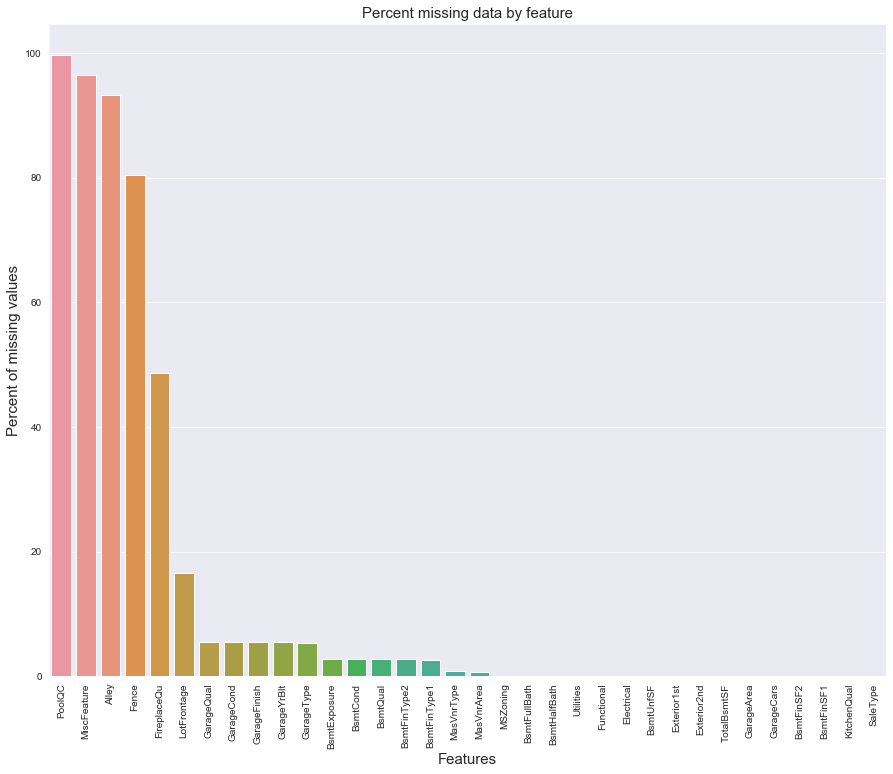

In [10]:
#将缺失度用图表的方式展示
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

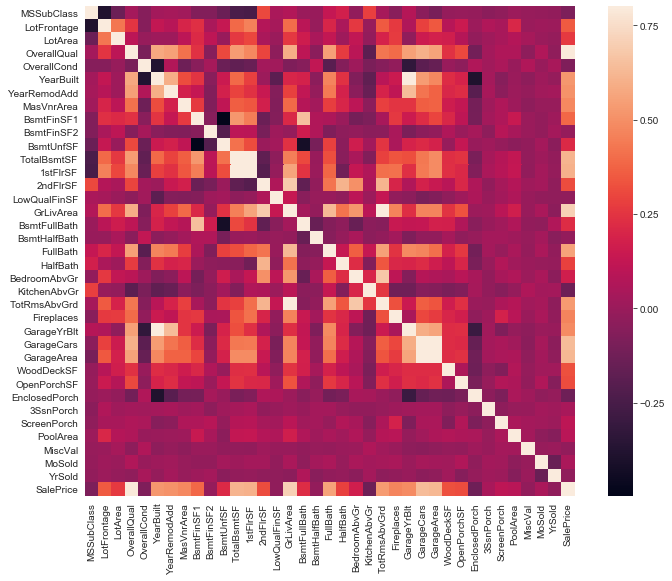

In [12]:
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

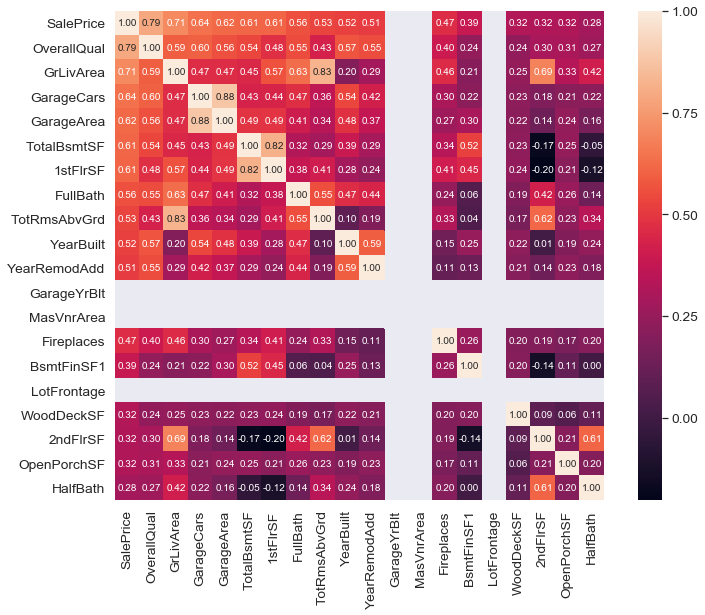

In [28]:
#选出k个与房价相关性最强的变量查看相关性系数

k = 20 #选择变量的个数
corrmat_abs=corrmat.abs()
cols = corrmat_abs.nlargest(k, 'SalePrice')['SalePrice'].sort_values(ascending=False).index
cm = np.corrcoef(train[cols].values.T)
f, ax = plt.subplots(figsize=(12, 9))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

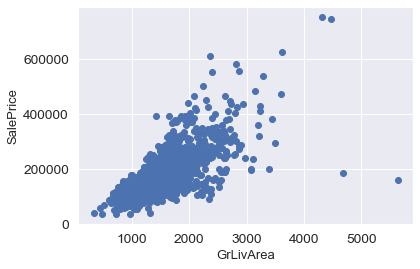

In [16]:
#GrLivArea代表含义是居住面积，发现和房价有比较明显的正相关关系
#可以在右下角看到两个明显的outlier，价格很低，但面积巨大，可以考虑删除掉这两个异常值。
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


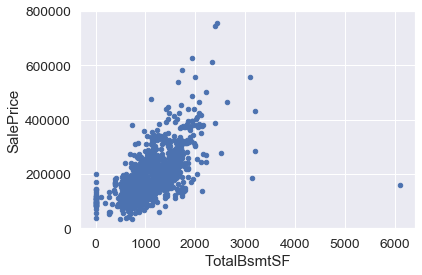

In [17]:
#TotalBsmtSF含义为地下室面积，发现地下室面积与房价似乎有更强的潜在线性关系，同时在右侧似乎也有一个异常值存在
var = 'TotalBsmtSF'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


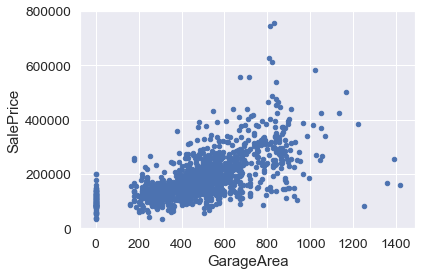

In [19]:
#GarageArea含义为车库面积，可以看到车库面积和房价也存在一定的正相关关系
var = 'GarageArea'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

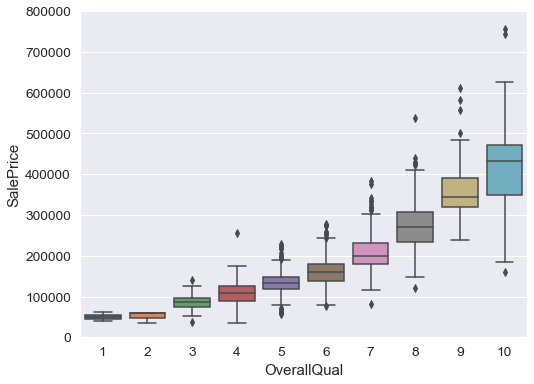

In [20]:
# 首先看一下房屋质量和房价之间的关系，可以看到随着房屋整体质量的变好，房屋的整体价格也在逐渐提高，是一个比较强力的预测变量
var = 'OverallQual'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

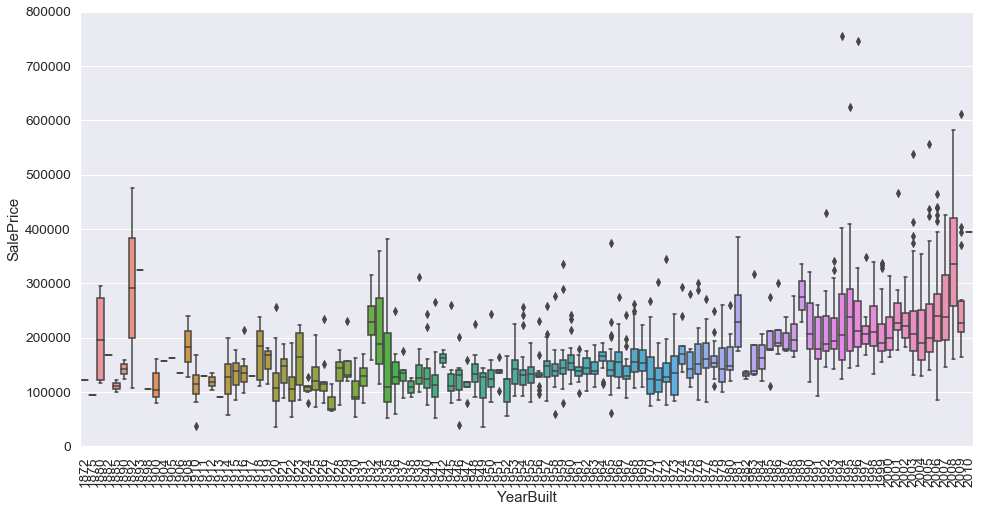

In [21]:
#再看一下房屋的建造时间和价格的关系，可以看到房屋的建造时间虽然没有和房价有明显的线性关系，
#但最近建造的新房屋，整体的价格会比较高，这个在后面的特征工程中可以用到

var = 'YearBuilt'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

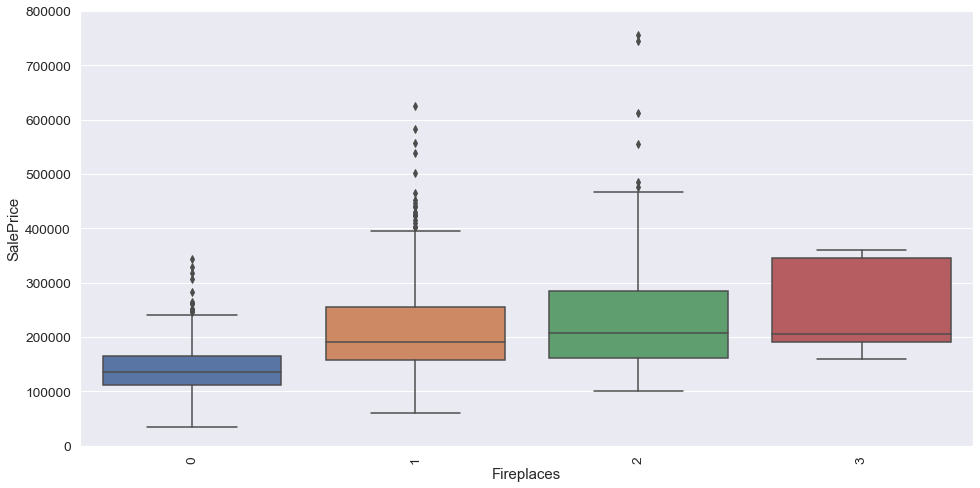

In [22]:
#再看一下壁炉数量和房价的关系，壁炉越多，房价越高
var = 'Fireplaces'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

## 二、数据处理

下一步对数据的质量做一些处理。分别对X和Y进行处理。
对于X，考虑异常值、缺失值、多重共线性问题。
对于Y，考虑是否符合回归分析假设中的正态分布假设。

##### 1.异常值处理

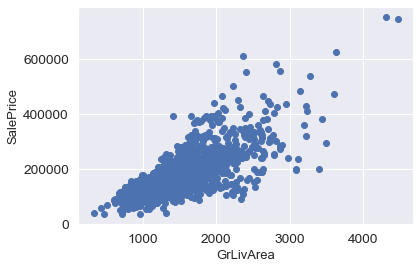

In [31]:
#删除掉房屋面积列中的异常值
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

##对异常值进行删除重新画图，可以看到异常值没有了
fig, ax = plt.subplots()
ax.scatter(train['GrLivArea'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

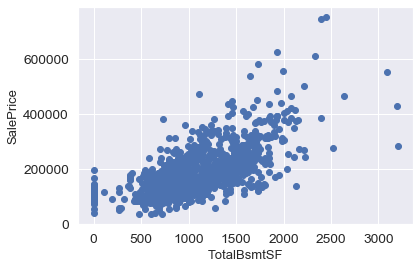

(1458, 80)

In [34]:
#对于地下室面积，做同样处理
train = train.drop(train[(train['TotalBsmtSF']>5000) & (train['SalePrice']<200000)].index)

fig, ax = plt.subplots()
ax.scatter(train['TotalBsmtSF'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('TotalBsmtSF', fontsize=13)
plt.show()
train.shape

#### 2.处理缺失值

In [33]:
#再看一下缺失值的分布情况
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(50)

,Missing Ratio
PoolQC,99.657417
MiscFeature,96.402878
Alley,93.216855
Fence,80.438506
FireplaceQu,48.646797
LotFrontage,16.649538
GarageQual,5.447071
GarageCond,5.447071
GarageFinish,5.447071
GarageYrBlt,5.447071


In [35]:
#PoolQC、MiscFeature、Alley的缺失值都在90%以上，可以考虑直接删掉这些特征
all_data= all_data.drop('PoolQC',axis=1)
all_data = all_data.drop('MiscFeature',axis=1)
all_data= all_data.drop('Alley',axis=1)

#删掉这3列后，变量变成了76列
all_data.shape

(2919, 76)

In [62]:
#Fence栅栏，FireplaceQu壁炉，如果数据缺失的话可能是代表房屋没有栅栏或壁炉，用None填补缺失值，代表没有
all_data["Fence"] = all_data["Fence"].fillna("None")
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")



(2919, 77)

In [58]:
#LotFrontage代表房屋前街道的长度，从现实中考虑，房屋前街道的长度可能是会和房屋所在一个街区的房屋相同，
#所以可以考虑同一个街区房屋LotFrontage的均值来填补缺失值

all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.mean()))

(2919, 77)

In [38]:
#Garage相关的车库变量，注意到这些变量的缺失比例是完全相同的，缺失这些变量的房屋可能是没有车库，用None填充
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')

In [39]:
#同样猜测缺失值缺失的原因可能是因为房屋没有车库，对于连续型变量用0填充
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)

In [40]:
#地下室相关连续变量，缺失同样认为房屋可能是没有地下室，用0填充
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)

In [41]:
#地下室相关离散变量，同理用None填充
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')

In [42]:
#Mas为砖石结构相关变量，缺失值同样认为是没有砖石结构，用0和none填补缺失值
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

In [43]:
#MSZoning代表房屋所处的用地类型，先看一下不同取值的个数
#可以看到RL的取值最多，
#业务上讲，房屋应该都有所在用地类型，且应该是上面几个值中的一个，所以有缺失值可能不是因为房屋没有用地类型导致，
#对于这种情况不适合用None填充，考虑用众数
all_data.groupby('MSZoning')['MasVnrType'].count().reset_index()

,MSZoning,MasVnrType
0,C (all),25
1,FV,139
2,RH,26
3,RL,2265
4,RM,460


In [46]:
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

In [44]:
all_data = all_data.drop(['Utilities'], axis=1)
all_data["Functional"] = all_data["Functional"].fillna("Typ")
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

In [56]:
#再检查还有没有缺失值，发现已经没有了，到这就完成了对缺失值的处理
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()
all_data.shape

(2919, 77)

#### 3.处理Y，关于是否满足回归分析中的前提假设，即因变量是否符合正态分布

通过房价的直方图分布和qq-plot进行检测。


 mu = 180932.92 and sigma = 79467.79



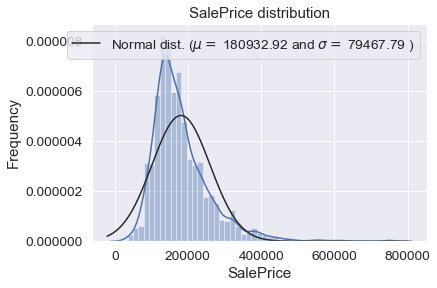

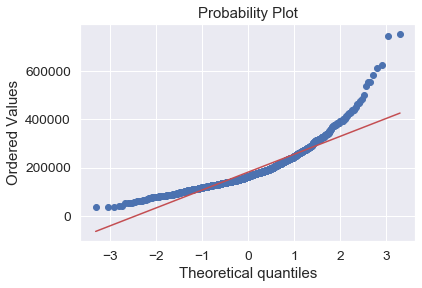

In [48]:
sns.distplot(train['SalePrice'] , fit=norm);

(mu, sigma) = norm.fit(train['SalePrice'])#???不懂
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()


 mu = 12.02 and sigma = 0.40



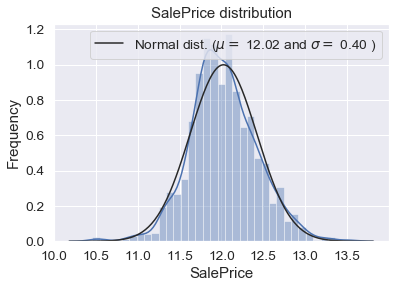

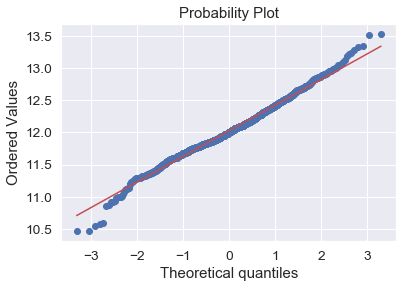

In [49]:
train["SalePrice"] = np.log1p(train["SalePrice"])

sns.distplot(train['SalePrice'] , fit=norm);

(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

## 三、特征工程

特征工程（Feature engineering）是将原始数据转换为能够更好地将潜在问题表示为预测模型的特征，进而提高对未知数据模型精度的过程。个人将特征工程主要分为三大部分：特征预处理、特征抽取、特征筛选

#### 1.特征抽取

In [57]:
#首先尝试创造出一些新特征
#加地下室面积、1楼面积、2楼面积加起来可以得到房屋总面积特征
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']
#之前可视化时候注意到，建造时间比较近的房子房价比较高，所以新创造一个01特征，
#如果房屋建造时间在1990年后，则为1，否则是0
all_data['YearBuilt_cut'] = all_data['YearBuilt'].apply(lambda x:1 if x>1990 else 0)
all_data.shape


(2919, 77)

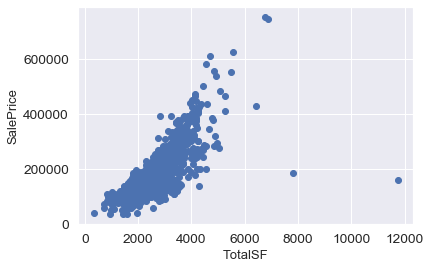

In [51]:
#查看新设计的两个特征房价的分布情况
tep = all_data[:ntrain]
tep['SalePrice'] =y_train

#房屋总面积特征，发现与房价有比较强的线性关系，但也有2个可能的异常值，可以考虑再去掉这两个异常值
fig, ax = plt.subplots()
ax.scatter(tep['TotalSF'], tep['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('TotalSF', fontsize=13)
plt.show()

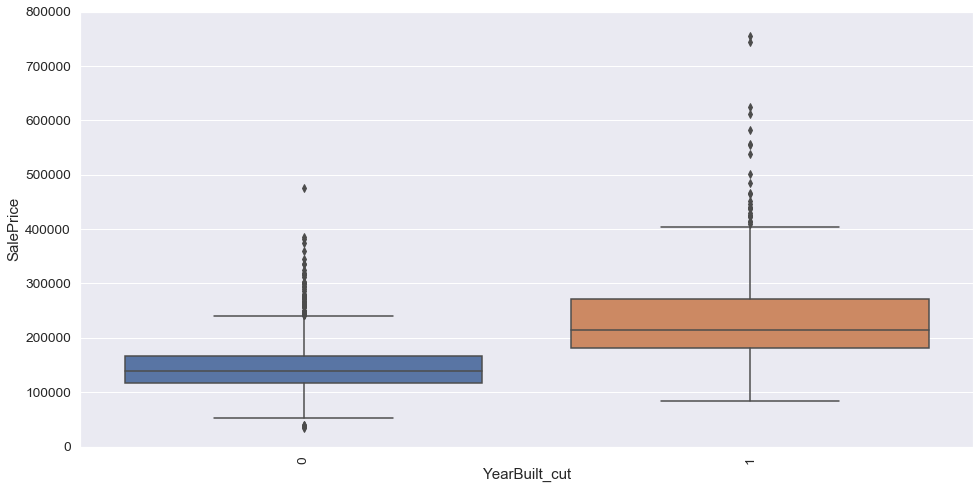

In [52]:
#建筑年限，可以看到1990年前建造的房子和1990后建造的房子房价在分布上有较大的差异
var = 'YearBuilt_cut'
data = pd.concat([tep['SalePrice'], tep[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

#### 2.特征预处理

一些离散变量是用英文字符串的形式储存，模型其实是无法理解这种字符串的，需要对这些特征进行编码。

In [54]:
#首先对于有序性离散变量，使用label encoder进行编码
from sklearn.preprocessing import LabelEncoder

cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

# shape        
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2919, 77)


In [64]:
#对于数据集中非有序性离散变量，进行独热编码
all_data = pd.get_dummies(all_data)


In [65]:
#看一下现在数据的列数，发现数据的列数增加了很多，这也是onehot编码的一个缺点，会大大增加数据的维度，
#可能会出现维度爆炸，对于这种情况，可以考虑再用pca降维
all_data.shape



(2919, 219)

In [66]:
all_data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,...,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,856,854,0,3,4,3,706.0,0.0,2,6,...,0,0,0,0,0,0,0,0,0,1
1,1262,0,0,3,4,1,978.0,0.0,0,6,...,0,0,0,0,0,0,0,0,0,1
2,920,866,0,3,4,2,486.0,0.0,2,6,...,0,0,0,0,0,0,0,0,0,1
3,961,756,0,3,1,3,216.0,0.0,0,6,...,0,0,0,0,0,0,0,0,0,1
4,1145,1053,0,4,4,0,655.0,0.0,2,6,...,0,0,0,0,0,0,0,0,0,1


#### 3.特征筛选

为避免多重共线性问题，下面识别皮尔逊相关性系数大于0.9的特征，并将这些特征删除。

In [67]:
threshold = 0.9

#相关性矩阵
corr_matrix = all_data.corr().abs()
corr_matrix.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,...,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
1stFlrSF,1.000000,0.249823,0.044086,0.108418,0.040297,0.247172,0.458206,0.084389,0.123944,0.024482,...,0.214149,0.005882,0.012406,0.000927,0.025617,0.001209,0.044160,0.214337,0.004251,0.163083
2ndFlrSF,0.249823,1.000000,0.032458,0.503506,0.016495,0.114369,0.161997,0.097654,0.158381,0.103646,...,0.012387,0.064275,0.004195,0.006715,0.030842,0.003710,0.003793,0.016457,0.038489,0.034428
3SsnPorch,0.044086,0.032458,1.000000,0.048279,0.004530,0.007307,0.050934,0.023268,0.048451,0.000965,...,0.026513,0.000832,0.006639,0.004280,0.009796,0.005747,0.005417,0.027589,0.005066,0.014798
BedroomAbvGr,0.108418,0.503506,0.048279,1.000000,0.003379,0.116382,0.113161,0.031111,0.105416,0.047212,...,0.050701,0.014303,0.004409,0.033248,0.037084,0.039499,0.022958,0.043436,0.033877,0.047671
BsmtCond,0.040297,0.016495,0.004530,0.003379,1.000000,0.103767,0.095140,0.003905,0.067643,0.072690,...,0.003567,0.015790,0.011458,0.013816,0.065433,0.006755,0.036183,0.006224,0.016353,0.025648


In [68]:
#只选择矩阵的上半部分
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,...,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
1stFlrSF,NaN,0.249823,0.044086,0.108418,0.040297,0.247172,0.458206,0.084389,0.123944,0.024482,...,0.214149,0.005882,0.012406,0.000927,0.025617,0.001209,0.044160,0.214337,0.004251,0.163083
2ndFlrSF,NaN,NaN,0.032458,0.503506,0.016495,0.114369,0.161997,0.097654,0.158381,0.103646,...,0.012387,0.064275,0.004195,0.006715,0.030842,0.003710,0.003793,0.016457,0.038489,0.034428
3SsnPorch,NaN,NaN,NaN,0.048279,0.004530,0.007307,0.050934,0.023268,0.048451,0.000965,...,0.026513,0.000832,0.006639,0.004280,0.009796,0.005747,0.005417,0.027589,0.005066,0.014798
BedroomAbvGr,NaN,NaN,NaN,NaN,0.003379,0.116382,0.113161,0.031111,0.105416,0.047212,...,0.050701,0.014303,0.004409,0.033248,0.037084,0.039499,0.022958,0.043436,0.033877,0.047671
BsmtCond,NaN,NaN,NaN,NaN,NaN,0.103767,0.095140,0.003905,0.067643,0.072690,...,0.003567,0.015790,0.011458,0.013816,0.065433,0.006755,0.036183,0.006224,0.016353,0.025648


In [69]:
#有6列特征需要删掉
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

print('There are %d columns to remove.' % (len(to_drop)))

There are 6 columns to remove.


In [70]:
all_data = all_data.drop(columns = to_drop)
all_data.shape

(2919, 213)

In [72]:
#之前是把train和test数据集放在一起处理，现在再把他们分开
train = all_data[:ntrain]
test = all_data[ntrain:]

## 四、建模

对于这次比赛，将尝试使用正则化线性回归模型，L1正则 lasso 、L2正则 Ridge。

In [73]:
#导入一些所需要的包
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

在做模型之前，先要建立一个本地验证集。目的是为了衡量模型的泛化误差避免出现过拟合等现象。
将训练集八二分，留出20%的数据作为测试集来测试模型的泛化效果。

In [75]:
#使用Sklearn的cross-valu-score函数去作为模型准确性的评估 cv=5五折交叉验证
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, train, y_train, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

In [76]:
#导入ridge模型
model_ridge = Ridge()


在导入模型后，需要对模型进行调参，对于lasso模型来说，主要需要调节的参数是alpha，alpha决定模型的正则化程度。
正则化程度越高，模型越不容易过度拟合。然而，它也会失去灵活性，可能会欠拟合，需要在过拟合和欠拟合中寻找一个平衡，找到那个最佳参数。
通过列出不同的alpha取值，并用上面定义的rmse_cv模型评分参数去看每个参数下模型的分数怎么样，来决定alpha的值。

In [77]:
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]


Text(0, 0.5, 'rmse')

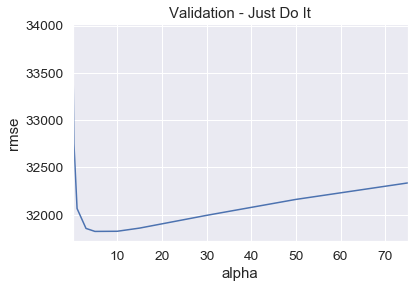

In [80]:
#可以看到曲线是一个耐克的标志，先降低后升高，在alpha值为5时，模型的误差最小。
%matplotlib inline
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation - Just Do It")
plt.xlabel("alpha")
plt.ylabel("rmse")


In [82]:
#alpha参数用之前验证过的5,然后用训练集对模型进行训练
clf = Ridge(alpha=5)
clf.fit(train,y_train)

Ridge(alpha=5, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [85]:
#最后对测试集进行预测
predict = clf.predict(test)

In [87]:
#部分预测结果
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = predict
sub.head(10)


,Id,SalePrice
0,1461,102537.765697
1,1462,148273.197705
2,1463,169109.507271
3,1464,176044.183327
4,1465,221118.749755
5,1466,167572.881438
6,1467,180090.243410
7,1468,158289.256326
8,1469,192391.267700
9,1470,122786.888126


In [88]:
sub.to_csv('submission.csv',index=False)